# Day and Night Image Classifier
---

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

*Note: All images come from the [AMOS dataset](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes).*


### Import resources

Before you get started on the project code, import the libraries and resources that you'll need.

In [1]:
from pathlib import Path
from typing import Tuple, List
import cv2 # computer vision library
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

## Training and Testing Data
The 200 day/night images are separated into training and testing datasets. 

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

First, we set some variables to keep track of some where our images are stored:

    image_dir_training: the directory where our training image data is stored
    image_dir_test: the directory where our test image data is stored

In [2]:
# Image data directories
# image_dir_training = "day_night_images/training/"
# image_dir_test = "day_night_images/test/"
image_dir_training: str = Path().absolute().joinpath("day_night_images/training/").__str__()
image_dir_test: str = Path().absolute().joinpath("day_night_images/test/").__str__()
image_dir_training, image_dir_test

('c:\\Users\\Chandan\\workspace\\repos\\cv-nanodegree-exercises\\1_1_Image_Representation\\day_night_images\\training',
 'c:\\Users\\Chandan\\workspace\\repos\\cv-nanodegree-exercises\\1_1_Image_Representation\\day_night_images\\test')

## Load the datasets

These first few lines of code will load the training day/night images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("day" or "night"). 

For example, the first image-label pair in `IMAGE_LIST` can be accessed by index: 
``` IMAGE_LIST[0][:]```.


In [3]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(image_dir_training)


## Construct a `STANDARDIZED_LIST` of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and numerical labels.

In [4]:
# Standardize all training images
STANDARDIZED_LIST = helpers.standardize(IMAGE_LIST)

## Visualize the standardized data

Display a standardized image from STANDARDIZED_LIST.

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


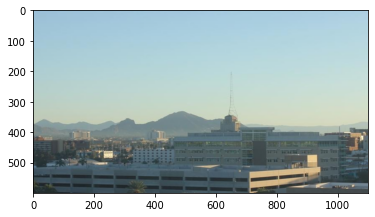

In [5]:
# Display a standardized image and its label

# Select an image by index
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))


# Feature Extraction

Create a feature that represents the brightness in an image. We'll be extracting the **average brightness** using HSV colorspace. Specifically, we'll use the V channel (a measure of brightness), add up the pixel values in the V channel, then divide that sum by the area of the image to get the average Value of the image.


---
###  Find the average brigtness using the V channel

This function takes in a **standardized** RGB image and returns a feature (a single value) that represent the average level of brightness in the image. We'll use this value to classify the image as day or night.

In [6]:
# Find the average Value or brightness of an image
def avg_brightness(rgb_image: np.ndarray) -> float:
    # Convert image to HSV
    hsv: np.ndarray = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    # Add up all the pixel values in the V channel
    sum_brightness: int = np.sum(hsv[:,:,2])
    ## TODO: Calculate the average brightness using the area of the image
    # and the sum calculated above
    avg: float = sum_brightness / (hsv.shape[0] * hsv.shape[1])
    return avg

Avg brightness: 35.202807575757575


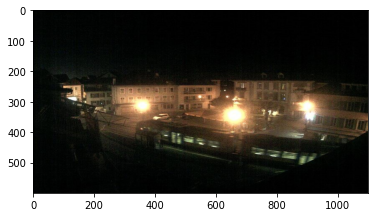

In [8]:
# Testing average brightness levels
# Look at a number of different day and night images and think about 
# what average brightness value separates the two types of images

# As an example, a "night" image is loaded in and its avg brightness is displayed
image_num = 190
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print('Avg brightness: ' + str(avg))
plt.imshow(test_im);

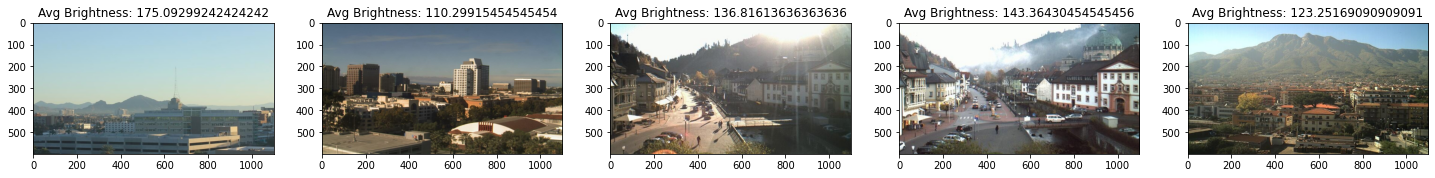

In [9]:
# Inspect the average brightness of the example day images
day_images: List[Tuple[np.ndarray, str]] = list(filter(lambda x: x[1] == 1, STANDARDIZED_LIST))
_, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(25, 25))
ax1.imshow(day_images[0][0])
ax1.set_title(f'Avg Brightness: {avg_brightness(rgb_image=day_images[0][0])}')
ax2.imshow(day_images[20][0])
ax2.set_title(f'Avg Brightness: {avg_brightness(rgb_image=day_images[20][0])}')
ax3.imshow(day_images[67][0])
ax3.set_title(f'Avg Brightness: {avg_brightness(rgb_image=day_images[67][0])}')
ax4.imshow(day_images[100][0])
ax4.set_title(f'Avg Brightness: {avg_brightness(rgb_image=day_images[100][0])}')
ax5.imshow(day_images[110][0])
ax5.set_title(f'Avg Brightness: {avg_brightness(rgb_image=day_images[110][0])}');

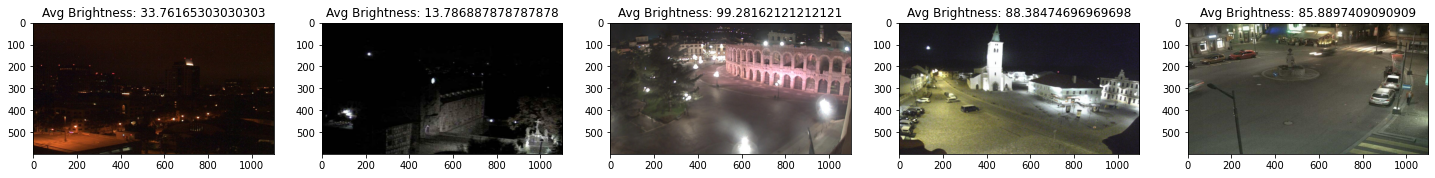

In [10]:
# Inspect the average brightness of the example night images
night_images: List[Tuple[np.ndarray, str]] = list(filter(lambda x: x[1] == 0, STANDARDIZED_LIST))
_, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(25, 25))
ax1.imshow(night_images[0][0])
ax1.set_title(f'Avg Brightness: {avg_brightness(rgb_image=night_images[0][0])}')
ax2.imshow(night_images[20][0])
ax2.set_title(f'Avg Brightness: {avg_brightness(rgb_image=night_images[20][0])}')
ax3.imshow(night_images[67][0])
ax3.set_title(f'Avg Brightness: {avg_brightness(rgb_image=night_images[67][0])}')
ax4.imshow(night_images[100][0])
ax4.set_title(f'Avg Brightness: {avg_brightness(rgb_image=night_images[100][0])}')
ax5.imshow(night_images[110][0])
ax5.set_title(f'Avg Brightness: {avg_brightness(rgb_image=night_images[110][0])}');

In [11]:
# We need to find an appropriate threshold value for the average brightness, which can be used to distinguish between the day and night images.
# For that we are going to first find individually for the day and night images, what are the average brightnesses for each class in this dataset. Since we have already created two separate collections isolating the day and night images, this should be easy to do.
avg_brightnesses_day: List[float] = list(map(lambda x: avg_brightness(rgb_image=x[0]), day_images))
avg_brightnesses_night: List[float] = list(map(lambda x: avg_brightness(rgb_image=x[0]), night_images))
avg_brightness_day: float = np.mean(avg_brightnesses_day)
avg_brightness_night: float = np.mean(avg_brightnesses_night)
print(f'Average brightness for day images: {avg_brightness_day}')
print(f'Average brightness for night images: {avg_brightness_night}')

Average brightness for day images: 137.33085929292932
Average brightness for night images: 69.17247169191918


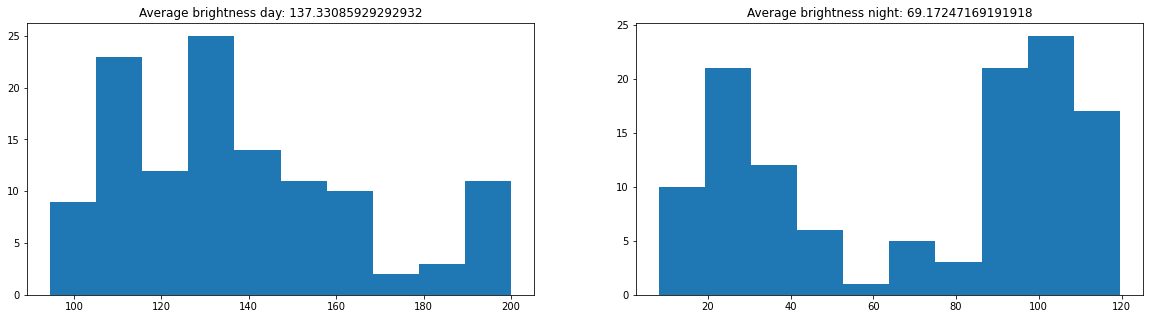

In [12]:
# Another useful thing is to look at the distributions of the average brightnesses for the day and night photos. That may help us to figure out and appropriate threshold for our classifier.
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
ax1.hist(avg_brightnesses_day)
ax1.set_title(f'Average brightness day: {avg_brightness_day}')
ax2.hist(avg_brightnesses_night)
ax2.set_title(f'Average brightness night: {avg_brightness_night}');

From the distribution above we take note of the following.
* Day images have an average brightness approximately ranging from 90 to 200.
* Night images have an average brightness approximately ranging from 10 to 120.
* There is an overlap. Hence, if we say, that any image having average brightness over 90 is classified as a day, image we'd miss-classify quite few of the night images as day ones.
* 100.0 may be starting value for the threshold and then we can adjust accordingly.

# Classification and Visualizing Error

In this section, we'll turn our average brightness feature into a classifier that takes in a standardized image and returns a `predicted_label` for that image. This `estimate_label` function should return a value: 0 or 1 (night or day, respectively).

---
### TODO: Build a complete classifier 

Complete this code so that it returns an estimated class label given an input RGB image.

In [14]:
# This function should take in RGB image input
def estimate_label(rgb_image: np.ndarray) -> int:
    
    ## TODO: extract average brightness feature from an RGB image 
    # Use the avg brightness feature to predict a label (0, 1)
    predicted_label = 0
    
    ## TODO: set the value of a threshold that will separate day and night images
    threshold: float = 100.
    
    ## TODO: Return the predicted_label (0 or 1) based on whether the avg is 
    # above or below the threshold
    if avg_brightness(rgb_image=rgb_image) >= threshold:
        predicted_label = 1
    
    return predicted_label    
    

### Determine Accuracy on Training Set

In [15]:
## Test out your code by calling the above function and seeing 
# how some of your training data is classified
predicted: List[int] = list(map(lambda x: estimate_label(rgb_image=x[0]), STANDARDIZED_LIST))
true_labels: List[int] = list(map(lambda x: x[1], STANDARDIZED_LIST))
accuracy: float = np.sum(np.array(predicted) == np.array(true_labels)) / len(STANDARDIZED_LIST)
print(f'Classification accuracy for training set: {accuracy}')

Classification accuracy for training set: 0.9041666666666667


With the prediction accuracy of approximately 90% we have definitely mis-classified some of our images. We have ways to find out these images.

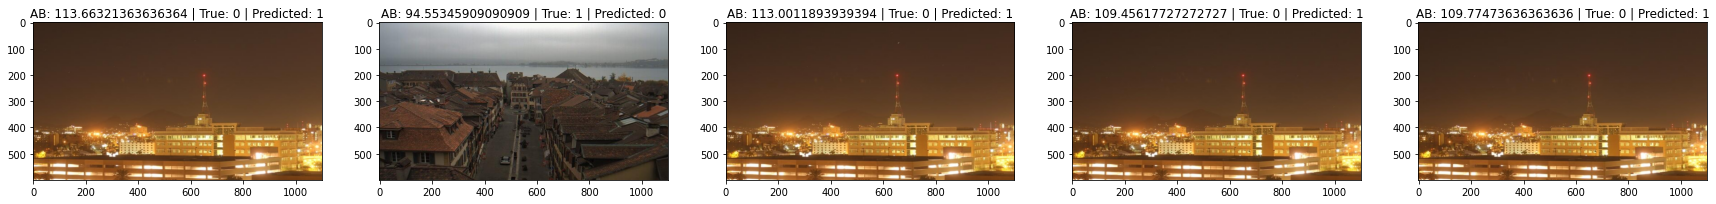

In [22]:
# Find the mis-classified images
compared: np.ndarray = np.array(predicted) == np.array(true_labels)
mis_classified_idx = np.where(compared == False)
rand_mis_classified_idx: np.ndarray = np.random.choice(a=mis_classified_idx[0], size=5, replace=False)
_, axs = plt.subplots(nrows=1, ncols=5, figsize=(30, 40))
for i in range(5):
    img: np.ndarray = STANDARDIZED_LIST[rand_mis_classified_idx[i]][0]
    true_label: int = true_labels[rand_mis_classified_idx[i]]
    predicted_label: int = predicted[rand_mis_classified_idx[i]]
    axs[i].imshow(img)
    axs[i].set_title(f'AB: {avg_brightness(img)} | True: {true_label} | Predicted: {predicted_label}')

So we see, that our classifier falls short with some cases in the training set, where either there is significant illumination at night time, resulting in a higher average brightness. At the same time it also fails for some day images, where the average brightness is lower due to weather conditions. In order to improve on this our classifier needs additional features. Next we are going to introduce the test dataset. Test dataset represents the unknown data, that the classifier has not seen before.

## Testing the classifier

Here is where we test your classification algorithm using our test set of data that we set aside at the beginning of the notebook!

Since we are using a pretty simple brightess feature, we may not expect this classifier to be 100% accurate. We'll aim for around 75-85% accuracy usin this one feature.


### Test dataset

Below, we load in the test dataset, standardize it using the `standardize` function you defined above, and then **shuffle** it; this ensures that order will not play a role in testing accuracy.


In [23]:
import random

# Using the load_dataset function in helpers.py
# Load test data
TEST_IMAGE_LIST = helpers.load_dataset(image_dir_test)

# Standardize the test data
STANDARDIZED_TEST_LIST = helpers.standardize(TEST_IMAGE_LIST)

# Shuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

## Determine the Accuracy

Compare the output of your classification algorithm (a.k.a. your "model") with the true labels and determine the accuracy.

This code stores all the misclassified images, their predicted labels, and their true labels, in a list called `misclassified`.

In [24]:
# Constructs a list of misclassified images given a list of test images and their labels
def get_misclassified_images(test_images):
    # Track misclassified images by placing them into a list
    misclassified_images_labels = []

    # Iterate through all the test images
    # Classify each image and compare to the true label
    for image in test_images:

        # Get true data
        im = image[0]
        true_label = image[1]

        # Get predicted label from your classifier
        predicted_label = estimate_label(im)

        # Compare true and predicted labels 
        if(predicted_label != true_label):
            # If these labels are not equal, the image has been misclassified
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    # Return the list of misclassified [image, predicted_label, true_label] values
    return misclassified_images_labels


In [25]:
# Find all misclassified images in a given test set
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

# Accuracy calculations
total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))

Accuracy: 0.925
Number of misclassified images = 12 out of 160


---
<a id='task9'></a>
### Visualize the misclassified images

Visualize some of the images you classified wrong (in the `MISCLASSIFIED` list) and note any qualities that make them difficult to classify. This will help you identify any weaknesses in your classification algorithm.

0


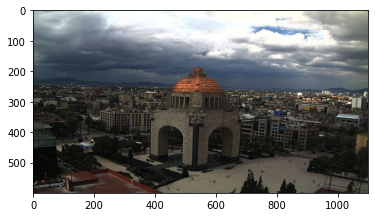

In [26]:
# Visualize misclassified example(s)
## TODO: Display an image in the `MISCLASSIFIED` list 
## TODO: Print out its predicted label - to see what the image *was* incorrectly classified as5
num = 0
test_mis_im = MISCLASSIFIED[num][0]
plt.imshow(test_mis_im)
print(str(MISCLASSIFIED[num][1]))

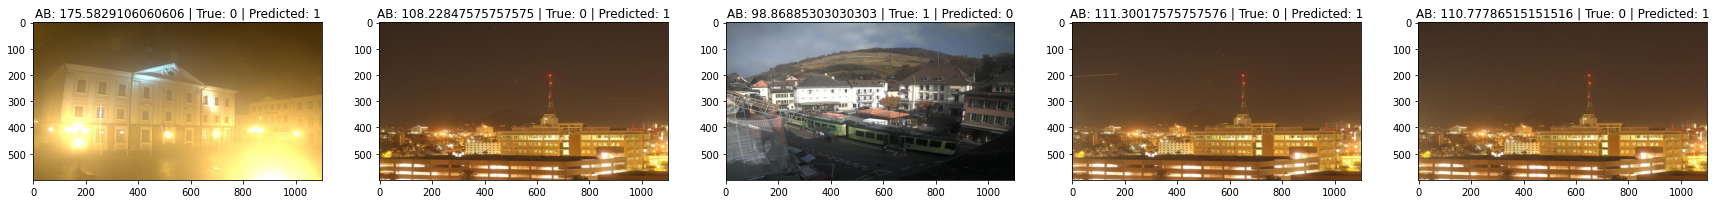

In [34]:
# It would be useful for us to look at some of the misclassified images to understand the probable reason, because which the classifier failed to correctly classify them.
mis_classified_idx: List[int] = list(range(len(MISCLASSIFIED)))
rand_mis_classified_idx: np.ndarray = np.random.choice(a=mis_classified_idx, size=5, replace=False)
_, axs = plt.subplots(nrows=1, ncols=5, figsize=(30, 40))
for i in range(5):
    img: np.ndarray = MISCLASSIFIED[rand_mis_classified_idx[i]][0]
    predicted_label: int = MISCLASSIFIED[rand_mis_classified_idx[i]][1]
    true_label: int = MISCLASSIFIED[rand_mis_classified_idx[i]][2]
    axs[i].imshow(img)
    axs[i].set_title(f'AB: {avg_brightness(img)} | True: {true_label} | Predicted: {predicted_label}')

---
<a id='question2'></a>
## (Question): After visualizing these misclassifications, what weaknesses do you think your classification algorithm has?

**Answer:** After visualizing some of the misclassified images our impression is the same as the one, which we derived in case of training set. Our classifier falls short with some cases in the test set, where either there is significant illumination at night time, resulting in a higher average brightness. At the same time it also fails for some day images, where the average brightness is lower due to weather conditions or shady areas. In order to improve on this our classifier needs additional features.

# 5. Improve your algorithm!

* (Optional) Tweak your threshold so that accuracy is better.
* (Optional) Add another feature that tackles a weakness you identified!
---
